In [146]:
# y_hat = h theta(x) = 1 / 1 + e - wx+b

# sigmoid(x) = 1 / 1 + e-x

# Update rule 
# w = w - a * dw
# b = b - a * db
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [147]:
class Regression:
  #initialize base class attributes
  def __init__(self, lr=0.01, n_iters=1000):
  # story lr and n_iters and set weight and bias 
  # to 0 or random to be updated by gradient descent
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  # Fit method for both linear and logistic 
  def fit(self, X, y):
    # unpack samples size and features for use in algo
    n_samples, n_features = X.shape
    # set weights for each feature to 0
    self.weights = np.zeros(n_features)
    self.bias = 0

    # gradient descent iteration
    for _ in range(self.n_iters):
      # predict y_pred with initial weight and bias 
      # y_pred = wx + b
      # If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
      # If both a and b are 2-D arrays, it is matrix multiplication
      linear_y_pred = np.dot(X, self.weights) + self.bias
      # transpose the X vectors, calculate the product to calculate derivative of weights
      dw = (1 / n_samples) * np.dot(X.T, (linear_y_pred - y))
      # sum for difference for derivative of bias
      db = (1 / n_samples) * np.sum(linear_y_pred - y)
      # set new weights and bias and repeat
      self.weights -= self.lr * dw
      self.bias -= self.lr *db

  def predict(self, X):
    return self._predict(X, self.weights, self.bias)

  def _predict(self, X, w, b):
    return NotImplementedError()
  
  def _approximation(self, X, w, b):
    return NotImplementedError()


class LinearRegression(Regression):
  def _approximation(self, X, w, b):
    return np.dot(X, w) + b

  def _predict(self, X, w, b):
    # predict y_pred with trained (gradient descent updated) weights and bias
    return np.dot(X, w) + b



class LogisticRegression(BaseRegression):
  def _approximation(self, X, w, b):
    linear_model = np.dot(X, w) + b
    return self._sigmoid(linear_model)

  def _predict(self, X, w, b):
    # predict y_pred with trained (gradient descent updated) weights and bias
    linear_model = np.dot(X, w) + b
    y_pred = self._sigmoid(linear_model)
    y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
    return np.array(y_pred_cls)

  # sigmoid function 
  def _sigmoid(self, x):
    return 1 / (np.exp(-x) + 1)

# Accuracy functions

In [148]:
# mean squared error function for linear regression
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)
  
# simple accuracy for for logistic regression
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

# Implimenting Linear Regression on Random Dataset

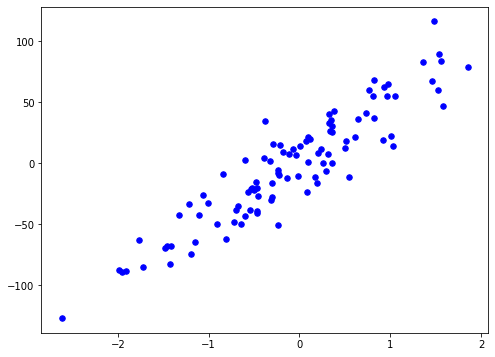

(80, 1)
(80,)


In [149]:
# Random dataset from sklearn
X, y = datasets.make_regression(n_samples=100, n_features =1, noise=20, random_state = 42)
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)
# plotting the dataset
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
plt.show()
print(X_train.shape)
print(y_train.shape)

MSE Value: 417.00933221477027


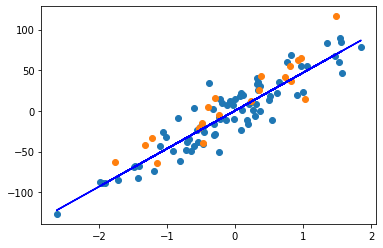

In [150]:
# Instantite the class
linreg = LinearRegression()
# Fit the training data
linreg.fit(X_train , y_train)
# capture prediction
preds = linreg.predict(X_test)
# Capture the mean squared error
mse_val = mse(preds, y_test)
print("MSE Value:", mse_val)

# Plotting the results
full_preds = linreg.predict(X)

fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.scatter(X_test,y_test)
plt.plot(X , full_preds, color='b')
plt.show()

# Implimenting Logistic Regression On Breast Cancer Dataset

In [151]:
# Loading the breast cancer dataset from sklearn
bc = datasets.load_breast_cancer()
# unpacking the data and target vectors
X, y = bc.data, bc.target
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

In [152]:
# instantiating the model
logreg = LogisticRegression()
# fit the training data
logreg.fit(X_train, y_train)
# Capture the predictions
preds = logreg.predict(X_test)
# Print the accuracy
print("LogReg From Scratch Accuracy: ", accuracy(preds, y_test))

LogReg From scratch accuracy:  0.8811188811188811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp
